In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf

Loading data from drive

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv")

testText = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jigsaw-toxic-comment-classification-challenge/test.csv/test.csv')
testLevel = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/jigsaw-toxic-comment-classification-challenge/test_labels.csv/test_labels.csv")

In [ ]:
print("Shape of train data: ", train.shape)
print("Shape of test data: ", testText.shape)

Shape of train data:  (159571, 8)
Shape of test data:  (153164, 2)


In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
testText.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
testLevel.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [4]:
test = pd.merge(testText,testLevel, on='id')
test = test[test['toxic']!=-1]
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [ ]:
test.shape

(63978, 8)

In [ ]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [ ]:
train[train.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

Visualzing the data

<ipython-input-5-b8bd4b0944ea>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comment_len,kde=False, color="blue")


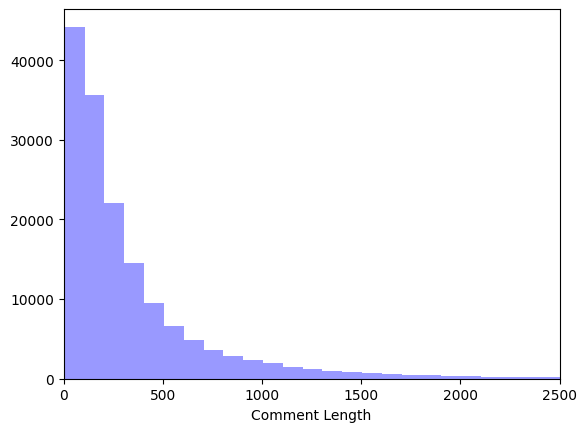

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len,kde=False, color="blue")
plt.xlim(0, 2500)

plt.xlabel('Comment Length')

# Display the plot
plt.show()

We can see most of the comments have short length and very few have length grater than 1000

Plotting the correlational matrix

<Axes: >

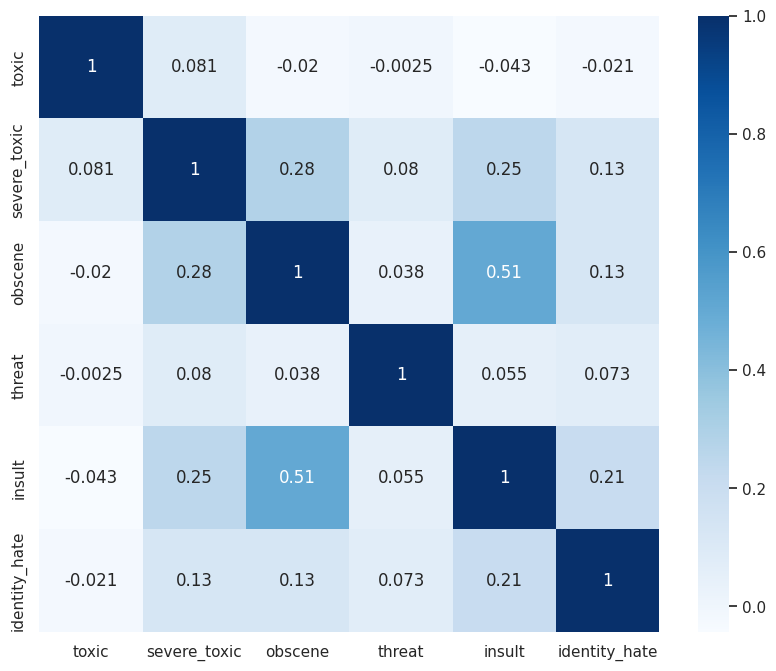

In [ ]:
rowsums = train.iloc[:, 2:8].sum(axis=1)
temp = train.iloc[:, 2:8]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

The highest levels of correlation can
be observed between the obscene and toxic

Preprocessing the data



1.   Removing Characters in between Text.
2. Removing Repeated Characters.

1.   Converting data to lower-case.
2.   Removing Punctuation.
3.   Removing unnecessary white spaces in between words.
2.   Removing “\n”.
3. Removing Non-English characters.





In [5]:
import re

def clean_text(text,remove_repeat_text=True, is_lower=True):

  if is_lower:
    text=text.lower()

  if remove_repeat_text:
    text = re.sub(r'(.)\1{2,}', r'\1', text)  #removes repeated characters.
    # uses regular expressions (re) to find consecutive occurrences of a character
    # and replaces them with a single instance of that character.
    # For example, it replaces "loooove" with "love" by reducing consecutive repeated characters to a single occurrence

  text = str(text).replace("\n", " ") #replaces newline characters (\n) with a space character
  text = re.sub(r'[^\w\s]',' ',text) #substitute any non-alphanumeric and non-whitespace characters with a space character.
  text = re.sub('[0-9]',"",text) #remove any numeric digits from the text
  text = re.sub(" +", " ", text) #replace multiple consecutive spaces with a single space
  text = re.sub("([^\x00-\x7F])+"," ",text) #remove any non-ASCII characters from the text
  return text

In [6]:
train['comment_text'] = train['comment_text'].apply(clean_text)
test['comment_text'] = test['comment_text'].apply(clean_text)

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,thank you for understanding i think very highl...,0,0,0,0,0,0
7,000247e83dcc1211,dear god this site is horrible,0,0,0,0,0,0
11,0002f87b16116a7f,somebody will invariably try to add religion ...,0,0,0,0,0,0
13,0003e1cccfd5a40a,it says it right there that it is a type the ...,0,0,0,0,0,0
14,00059ace3e3e9a53,before adding a new product to the list make ...,0,0,0,0,0,0


Removing Stopwords using NLTK stopwords

In [7]:
import nltk
from nltk.corpus import stopwords

In [8]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
testText.shape

(153164, 2)

In [9]:
from tqdm.notebook import tqdm_notebook

In [10]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text, remove_stop=True):
  output = ""
  if remove_stop:
    text=text.split(" ")
    for word in text:
      if word not in stop_words:
        output=output + " " + word
  else :
    output=text

  return str(output.strip())

#Removing Stopwords from Training Data
processed_train_data = []
for line in train["comment_text"]:
    processed_train_data.append(remove_stopwords(line))

#Removing Stopwords from Test Data
processed_test_data = []
for line in test["comment_text"]:
    processed_test_data.append(remove_stopwords(line))

In [ ]:
processed_train_data[0]

'explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired'

In [ ]:
processed_test_data[0]

'thank understanding think highly would revert without discussion'

In [11]:
train["comment_text"] = processed_train_data
test["comment_text"] = processed_test_data
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0


Tokenization

In [12]:
CATEGORIES = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

X_train = train["comment_text"]
y_train = train[CATEGORIES].values
X_test = test['comment_text']
y_test = test[CATEGORIES].values
X_train

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
y_train[6]

array([1, 1, 1, 0, 1, 0])

In [13]:
from keras.preprocessing.text import Tokenizer

max_features=100000

tokenizer = Tokenizer(num_words=max_features,oov_token='<nothing>')
tokenizer.fit_on_texts(X_train)


In [ ]:
tokenizer.word_index['the']

2183

Padding the sequence

In [14]:
from keras.utils import pad_sequences
maxpadlen = 500


In [15]:
def tokenization(data):
  data = tokenizer.texts_to_sequences(data)
  data=pad_sequences(data, maxlen=maxpadlen, padding = 'post')
  return data

In [16]:
X_train = tokenization(X_train)
X_test = tokenization(X_test)

In [ ]:
X_train

array([[  532,    47,    49, ...,     0,     0,     0],
       [15302,  2372,   420, ...,     0,     0,     0],
       [  284,   294,    53, ...,     0,     0,     0],
       ...,
       [29860,  6823,  4757, ...,     0,     0,     0],
       [  434,     9,   111, ...,     0,     0,     0],
       [   53,    12,   147, ...,     0,     0,     0]], dtype=int32)

BAKI
Fast text embedding
model building
ml flow
paramater tuing

In [ ]:
X_train.shape

(159571, 500)

In [ ]:
X_test.shape

(63978, 500)

Initaialing the word embedding using Sentence Transformer

Importing sentence transformer

In [ ]:
# !pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=3ebd206aee087aa604d6027a6fe768b3500843260c2e8e86523e6e896d180ae9
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
# from sentence_transformers import SentenceTransformer

# model_name = 'all-MiniLM-L6-v2'
# sentence_transformer_model = SentenceTransformer(model_name)

In [ ]:
# Converting sequences back to sentences
# sentences = tokenizer.sequences_to_texts(X_train)

# Obtaining sentence embeddings using the Sentence Transformer model
# sentence_embeddings = sentence_transformer_model.encode(sentences)

Saving the sentence_embedding in drive

In [ ]:
# df_embeddings = pd.DataFrame(sentence_embeddings)
# df_embeddings.to_csv('/content/drive/MyDrive/Colab Notebooks/sentence_embeddings.csv', index=False)

In [ ]:
# type(sentence_embeddings)

numpy.ndarray

Directly load the embedded sentences

In [17]:
loaded_df_embeddings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentence_embeddings.csv')
sentence_embeddings = loaded_df_embeddings.values

Creating a LSTM model

In [18]:
import tensorflow
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [19]:
num_classes = 6
epochs = 10
batch_size = 64

In [ ]:

# lstm_model = Sequential()

# embedding_layer = Embedding(input_dim=sentence_embeddings.shape[0],  # Number of words in the vocabulary
#                             output_dim=sentence_embeddings.shape[1],  # Size of the embeddings
#                             weights=[sentence_embeddings],  # Use the loaded embeddings
#                             input_length=maxpadlen,
#                             trainable=False)  # Freeze the embeddings

# lstm_model.add(embedding_layer)
# lstm_model.add(LSTM(units=64, return_sequences=True))
# lstm_model.add(LSTM(units=32))
# lstm_model.add(Dense(units=num_classes, activation='sigmoid'))  # Output layer for multi-label classification

# # Compiling the model
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [20]:
from keras.models import Model
from keras.layers import *

In [21]:
inp=Input(shape=(maxpadlen, ),dtype='int32')
embedding_layer = Embedding(input_dim=sentence_embeddings.shape[0],  # Number of words in the vocabulary
                            output_dim=sentence_embeddings.shape[1],  # Size of the embeddings
                            weights=[sentence_embeddings],  # Use the loaded embeddings
                            input_length=maxpadlen,
                            trainable=False)  # Freeze the embeddings
embedded_sequences = embedding_layer(inp)
x = LSTM(50, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.2)(x)
x = Dense(40, activation="relu", kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)
preds = Dense(6, activation="sigmoid", kernel_initializer='glorot_uniform')(x)

#Compile the Model.
lstm_model = Model(inputs=inp, outputs=preds)

lstm_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


  26/4987 [..............................] - ETA: 38:10 - loss: 0.5436 - accuracy: 0.0433

KeyboardInterrupt: ignored

In [ ]:
# lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 384)          61275264  
                                                                 
 lstm (LSTM)                 (None, 500, 64)           114944    
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 61,402,822
Trainable params: 127,558
Non-trainable params: 61,275,264
_________________________________________________________________


In [ ]:
from keras.utils import plot_model

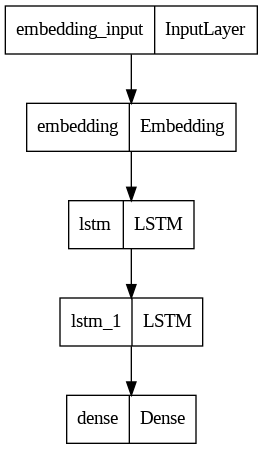

In [ ]:
# plot_model(lstm_model)

In [ ]:
y_train

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
# Training the LSTM model
lstm_model_info=lstm_model.fit(X_train,y_train, epochs=1, batch_size=32,  validation_data = (X_test, y_test))

Epoch 1/10
1995/1995 [==============================] - 130s 38ms/step - loss: 0.3440 - accuracy: 0.9897 - val_loss: 0.3415 - val_accuracy: 0.9941
Epoch 2/10
1995/1995 [==============================] - 75s 37ms/step - loss: 0.3416 - accuracy: 0.9942 - val_loss: 0.3386 - val_accuracy: 0.9941
Epoch 3/10
1995/1995 [==============================] - 75s 38ms/step - loss: 0.3400 - accuracy: 0.9942 - val_loss: 0.3375 - val_accuracy: 0.9941
Epoch 4/10
1995/1995 [==============================] - 71s 35ms/step - loss: 0.3387 - accuracy: 0.9942 - val_loss: 0.3383 - val_accuracy: 0.9941
Epoch 5/10
1995/1995 [==============================] - 70s 35ms/step - loss: 0.3374 - accuracy: 0.9942 - val_loss: 0.3364 - val_accuracy: 0.9941
Epoch 6/10
1995/1995 [==============================] - 74s 37ms/step - loss: 0.3361 - accuracy: 0.9942 - val_loss: 0.3341 - val_accuracy: 0.9941
Epoch 7/10
1995/1995 [==============================] - 71s 35ms/step - loss: 0.3350 - accuracy: 0.9942 - val_loss: 0.3343 

Saving the LSTM model

In [ ]:
lstm_model.save('/content/drive/MyDrive/Colab Notebooks/Toxic_comments_models/simple_lstm_model')

Loading pretrained LSTM model from drive

In [ ]:
from keras.models import load_model

lstm_model = load_model("/content/drive/MyDrive/Colab Notebooks/Toxic_comments_models/simple_lstm_model")

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 384)          61275264  
                                                                 
 lstm (LSTM)                 (None, 500, 64)           114944    
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 61,402,822
Trainable params: 127,558
Non-trainable params: 61,275,264
_________________________________________________________________


Testing our model on testing dataset

In [ ]:
y_test_pred = lstm_model.predict(X_test)

2000/2000 [==============================] - 15s 7ms/step


In [ ]:
y_test_pred

array([[2.8364107e-02, 1.2528172e-04, 4.6131331e-03, 3.7835914e-04,
        6.3911784e-03, 1.0075907e-03],
       [2.0643361e-01, 5.5702818e-03, 6.5690719e-02, 9.2274873e-03,
        8.1175461e-02, 1.6996739e-02],
       [7.4510716e-02, 4.7254039e-04, 1.6273513e-02, 9.7922096e-04,
        2.3071641e-02, 2.5647299e-03],
       ...,
       [6.8793461e-02, 9.2598202e-04, 1.5427492e-02, 2.2044857e-03,
        2.2089101e-02, 4.5779604e-03],
       [9.8131865e-01, 1.6999421e-01, 9.0711367e-01, 4.4246703e-02,
        7.3562568e-01, 1.4395796e-01],
       [3.0953921e-02, 1.6554272e-04, 5.5125644e-03, 5.0572382e-04,
        7.5787939e-03, 1.1938211e-03]], dtype=float32)

In [ ]:
threshold = 0.5
y_test_pred_labels = (y_test_pred > threshold).astype(int)
print(y_test_pred_labels)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [0 0 0 0 0 0]]


Evaluating

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def evaluation(prediction, actual):
  accuracy = accuracy_score(actual, prediction)
  f1 = f1_score(actual, prediction, average='weighted')
  recall = recall_score(actual, prediction, average='weighted')
  precision = precision_score(actual, prediction, average='weighted')

  print("Accuracy:", accuracy)
  print("F1-score:", f1)
  print("Recall:", recall)
  print("Precision:", precision)

  # Plot the confusion matrix
def plot_confusion(prediction, actual):
  cm = confusion_matrix(actual.argmax(axis=1), prediction.argmax(axis=1))
  classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
evaluation(actual=y_test, prediction=y_test_pred_labels)

Accuracy: 0.90241958173122
F1-score: 0.0
Recall: 0.0
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


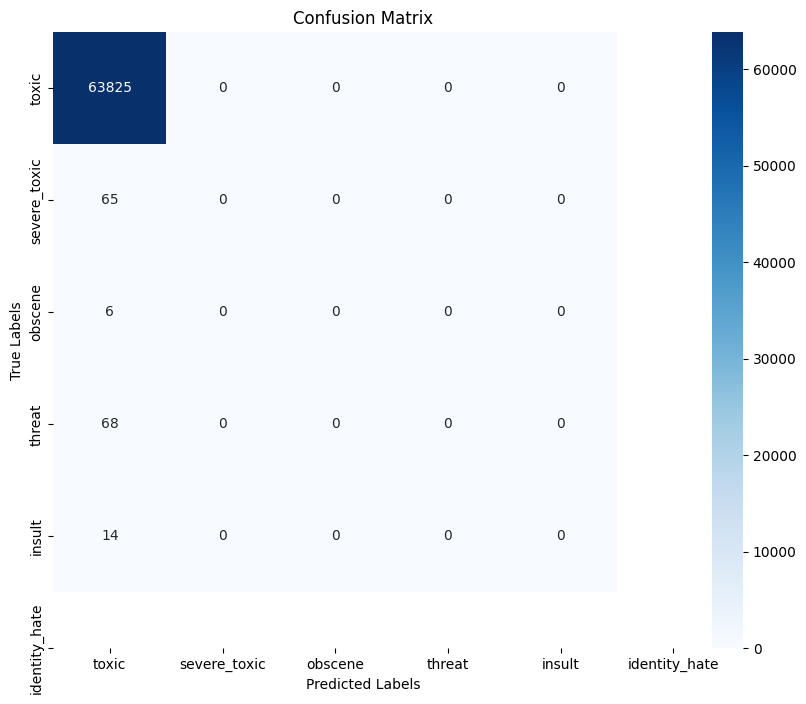

In [ ]:
plot_confusion(actual=y_test, prediction=y_test_pred_labels)

In [ ]:
y_test

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
input_text = ["hey i freaken hate you"]
input_text = tokenization(input_text)
input_text
lstm_model.predict(input_text)

1/1 [==============================] - 0s 44ms/step


array([[0., 0., 0., 0., 0., 0.]], dtype=float32)